<a href="https://colab.research.google.com/github/femartinsamorim/tera_datascience_e_machinelearning/blob/main/analise_exploratoria_desafio_01_inferencia_depressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Qual o perfil de indivíduos (adultos maiores de 18 anos) com sintomas depressivos nos EUA no período de 2005-2006?

**Resposta**: 

* Gênero: Feminino
* Idade: 18 Anos
* Raça/Etnia: Mexicano-Americano
* Escolaridade: Ensino Superior Incompleto
* Renda Anual Familiar: Maior que 20000

**Dicionários das bases**:

DEMO_PHQ.csv: banco de dados contendo 5334 observações de adultos pesquisados no NHANES 2005-2006: 



In [120]:
# BIBLIOTECAS UTILIZADAS

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno

In [121]:
# IMPORTANDO O DATASET

df_depression = pd.read_csv('/content/DEMO_PHQ.csv',delimiter=',')
df_heathly_habits = pd.read_csv('/content/PAG_HEI.csv', delimiter=',')

In [122]:
# RENOMEANDO AS COLUNAS PARA PT-BR

df_depressao = df_depression.rename(columns={"SEQN":"Identificador","RIAGENDR":"Gênero","RIDAGEYR":"Idade","RIDRETH1":"Raça",\
                                             "DMDEDUC":"Escolaridade","INDFMINC":"Renda_Anual"})

In [123]:
df_depressao.head(8)

,Identificador,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,Gênero,Idade,Raça,Escolaridade,Renda_Anual
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0
5,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,19,3,4,11.0
6,31144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,21,2,3,3.0
7,31149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,85,3,2,1.0


In [124]:
df_depressao.describe().round().astype(int)

,Identificador,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,Gênero,Idade,Raça,Escolaridade,Renda_Anual
count,5334,4836,4836,4836,4836,4836,4836,4836,4836,4836,5334,5334,5334,5334,5287
mean,36359,0,0,1,1,0,0,0,0,0,2,45,3,3,9
std,2965,1,1,1,1,1,1,1,1,0,0,20,1,1,13
min,31130,0,0,0,0,0,0,0,0,0,1,18,1,1,1
25%,33838,0,0,0,0,0,0,0,0,0,1,27,3,2,4
50%,36348,0,0,0,0,0,0,0,0,0,2,43,3,3,7
75%,38916,0,0,1,1,0,0,0,0,0,2,62,4,4,10
max,41473,9,9,9,9,9,9,9,9,9,2,85,5,9,99


In [125]:
df_depressao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Identificador  5334 non-null   int64  
 1   DPQ010         4836 non-null   float64
 2   DPQ020         4836 non-null   float64
 3   DPQ030         4836 non-null   float64
 4   DPQ040         4836 non-null   float64
 5   DPQ050         4836 non-null   float64
 6   DPQ060         4836 non-null   float64
 7   DPQ070         4836 non-null   float64
 8   DPQ080         4836 non-null   float64
 9   DPQ090         4836 non-null   float64
 10  Gênero         5334 non-null   int64  
 11  Idade          5334 non-null   int64  
 12  Raça           5334 non-null   int64  
 13  Escolaridade   5334 non-null   int64  
 14  Renda_Anual    5287 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 625.2 KB


<Axes: >

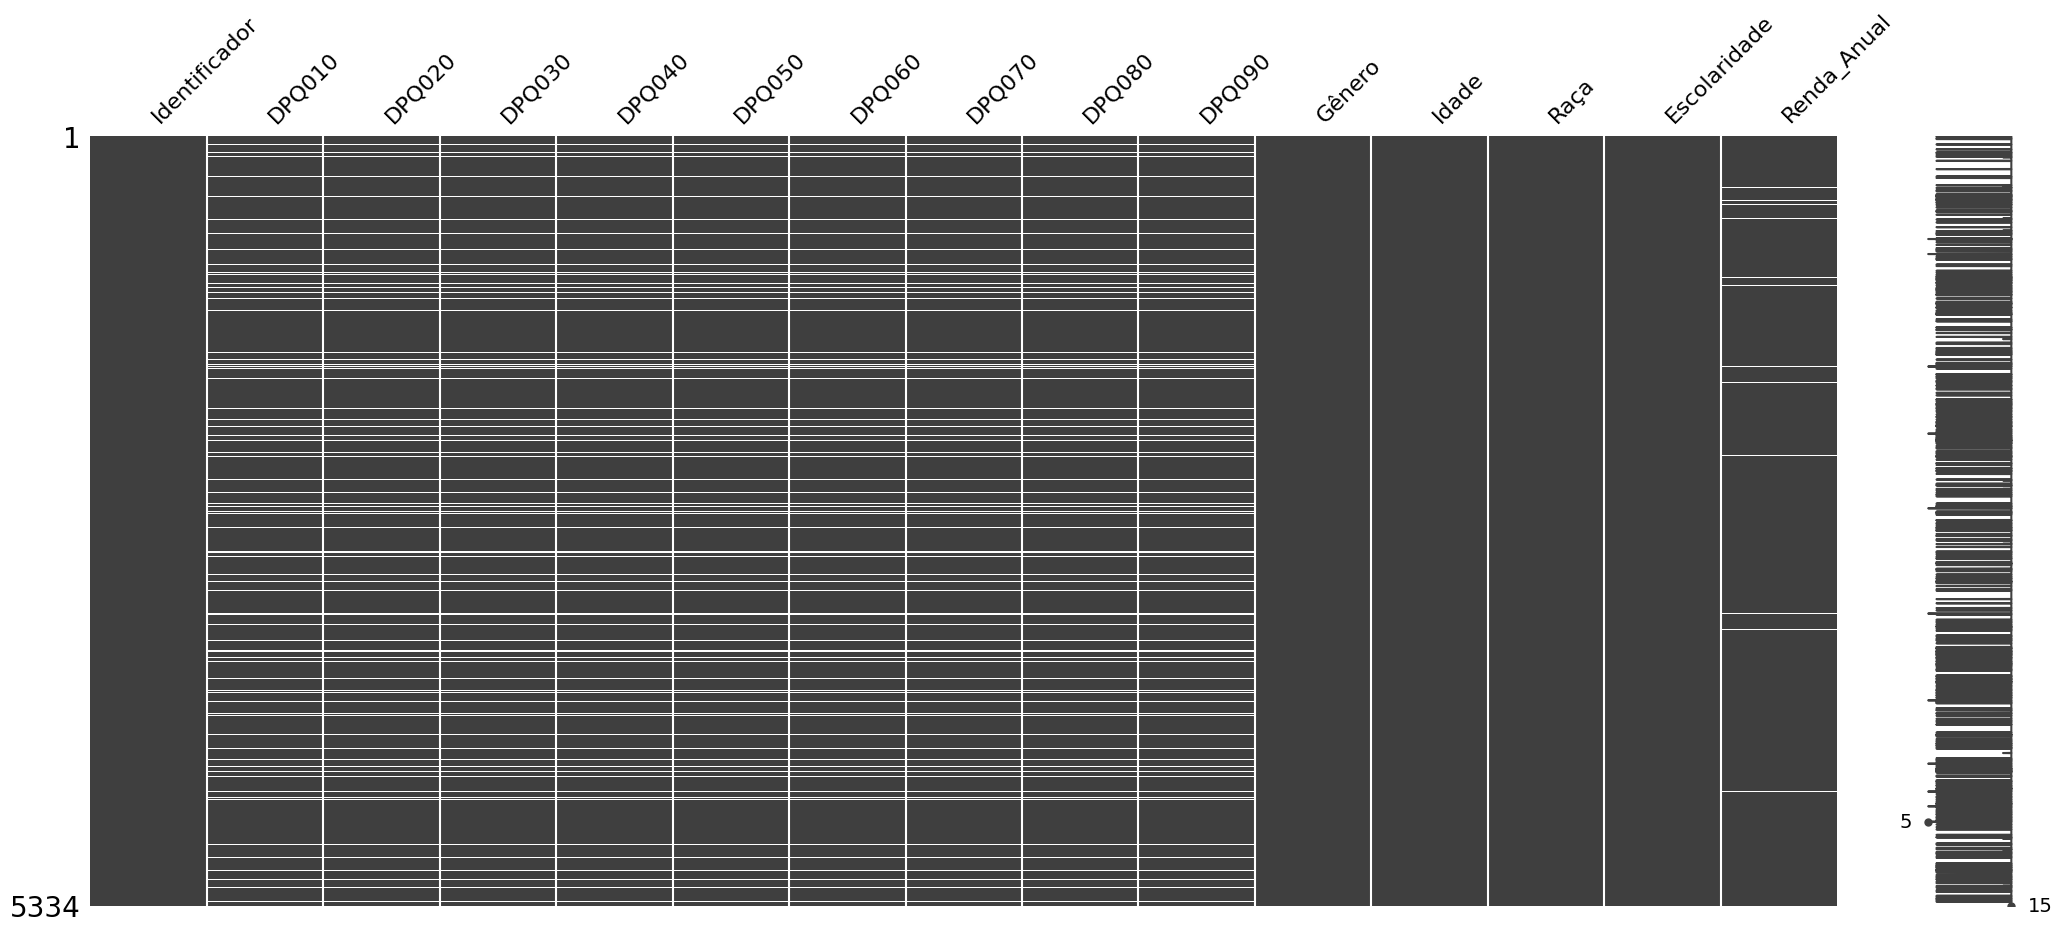

In [147]:
# VERIFICANDO ITENS NULOS NA MATRIX COMPLETA

msno.matrix(df_depressao)

In [127]:
# VERIFICANDO A QUANTIDADE ITENS NULOS

df_depressao.isnull().sum()

Identificador      0
DPQ010           498
DPQ020           498
DPQ030           498
DPQ040           498
DPQ050           498
DPQ060           498
DPQ070           498
DPQ080           498
DPQ090           498
Gênero             0
Idade              0
Raça               0
Escolaridade       0
Renda_Anual       47
dtype: int64

In [128]:
# VERIFICANDO A QUANTIDADE ITENS NULOS (PORCENTAGEM)

100*df_depressao.isnull().sum().round()/df_depressao.shape[0]

Identificador    0.000000
DPQ010           9.336333
DPQ020           9.336333
DPQ030           9.336333
DPQ040           9.336333
DPQ050           9.336333
DPQ060           9.336333
DPQ070           9.336333
DPQ080           9.336333
DPQ090           9.336333
Gênero           0.000000
Idade            0.000000
Raça             0.000000
Escolaridade     0.000000
Renda_Anual      0.881140
dtype: float64

In [129]:
# DESCRIÇÃO DA RAÇA/ETNIA PELO GÊNERO

df_depressao.groupby(['Gênero'])['Raça'].describe().round().astype(int)

,count,mean,std,min,25%,50%,75%,max
Gênero,,,,,,,,
1,2561,3,1,1,3,3,4,5
2,2773,3,1,1,3,3,4,5


In [130]:
# DESCRIÇÃO DA RAÇA/ETNIA PELA IDADE

df_depressao.groupby(['Gênero'])['Idade'].describe().round().astype(int)

,count,mean,std,min,25%,50%,75%,max
Gênero,,,,,,,,
1,2561,46,20,18,28,44,63,85
2,2773,44,20,18,26,41,60,85


In [131]:
# DESCRIÇÃO DA RAÇA/ETNIA PELA ESCOLARIDADE

df_depressao.groupby(['Gênero'])['Escolaridade'].describe().round().astype(int)

,count,mean,std,min,25%,50%,75%,max
Gênero,,,,,,,,
1,2561,3,1,1,2,3,4,9
2,2773,3,1,1,2,3,4,9


TypeError: ignored

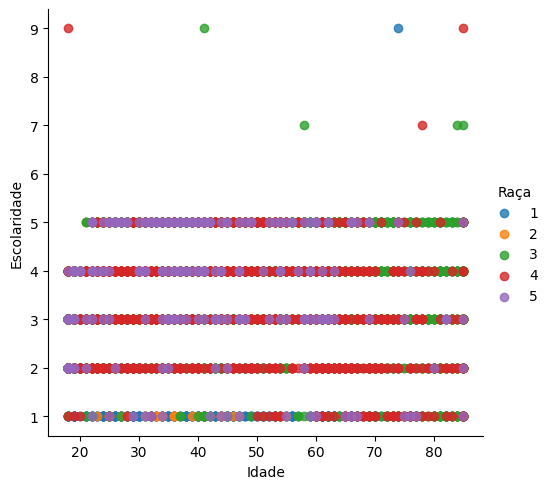

In [135]:
sns.lmplot(x = 'Idade', y = 'Escolaridade', hue = 'Raça', data = df_depressao, fit_reg = False)

plt.xlabel('Idade')
plt.ylabel('Escolaridade')
plt.show()

In [136]:
# MÉTODO PARA AGRUPAR AS VARIÁVEIS

df_depressao.groupby("Raça")["Escolaridade"].unique()

Raça
1       [3, 1, 2, 4, 5, 9]
2          [3, 2, 1, 4, 5]
3    [4, 5, 3, 2, 1, 7, 9]
4    [4, 3, 1, 2, 5, 9, 7]
5          [3, 5, 2, 4, 1]
Name: Escolaridade, dtype: object

In [137]:
# MÉDIA DAS IDADES

df_depressao['Idade'].mean().astype(int)

45

In [138]:
# SELECIONANDO LINHAS DE FORMA ALEATÓRIAS

df_depressao.sample(5)

,Identificador,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,Gênero,Idade,Raça,Escolaridade,Renda_Anual
145,31429,1.0,0.0,1.0,2.0,1.0,0.0,0.0,3.0,0.0,1,40,4,2,10.0
1008,33196,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2,28,3,5,8.0
5064,40944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,18,3,2,9.0
2860,36749,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,50,3,3,11.0
4978,40769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,33,3,5,11.0


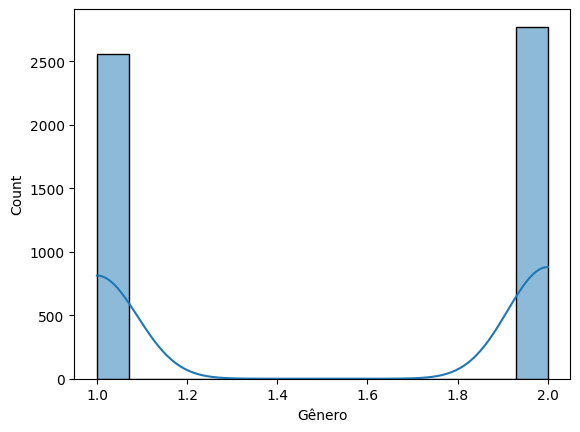

In [139]:
# GRÁFICO PELO GÊNERO

sns.histplot(df_depressao['Gênero'], kde=True);

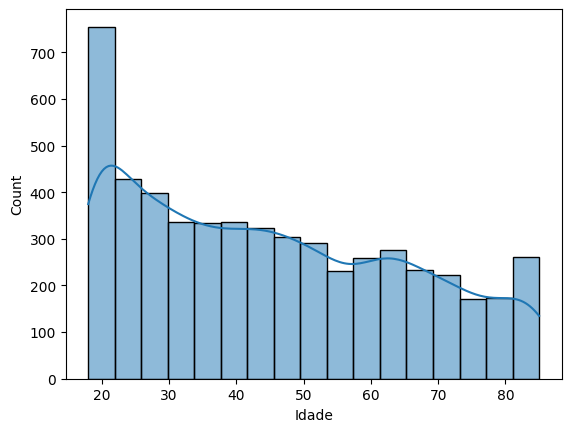

In [140]:
# GRÁFICO PELA IDADE

sns.histplot(df_depressao['Idade'], kde=True);

<Axes: xlabel='Idade', ylabel='Count'>

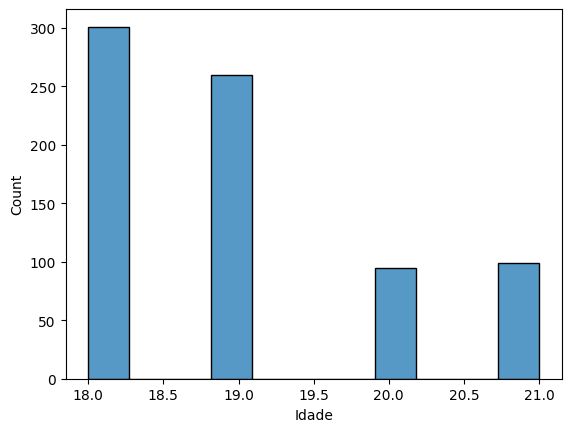

In [141]:
# # GRÁFICO PELA IDADE (MENORES DE 21)

sns.histplot(data=df_depressao[df_depressao.Idade <= 21], x='Idade')

# OBS.: FILTRO REALIZADO PARA DETALHAR MELHOR AS IDADES DENTRO DO MAIOR INTERVALO 

<Axes: xlabel='Raça', ylabel='Count'>

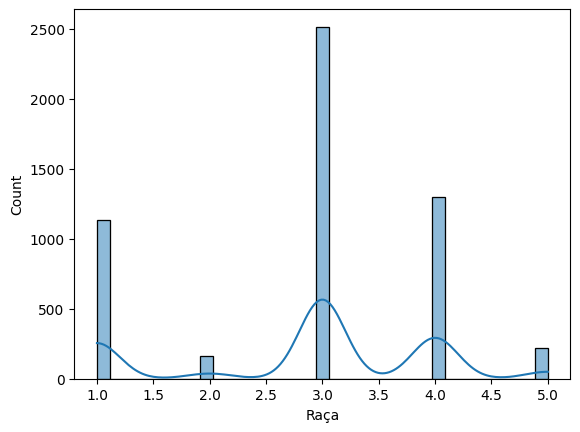

In [142]:
# GRÁFICO PELA RAÃ/ETNIA

sns.histplot(df_depressao['Raça'], kde=True)

<Axes: xlabel='Escolaridade', ylabel='Count'>

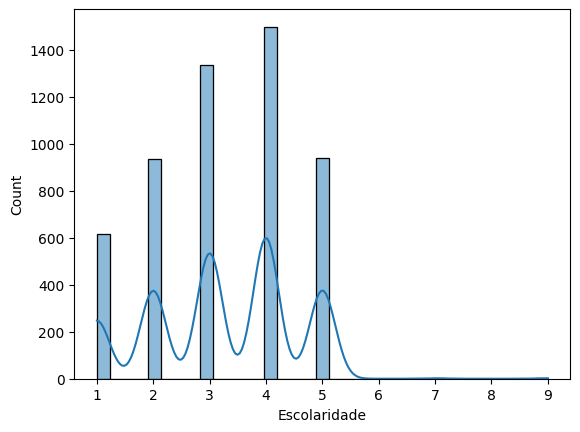

In [143]:
# GRÁFICO PELA ESCOLARIDADE

sns.histplot(df_depressao['Escolaridade'], kde=True)

<Axes: xlabel='Renda_Anual', ylabel='Count'>

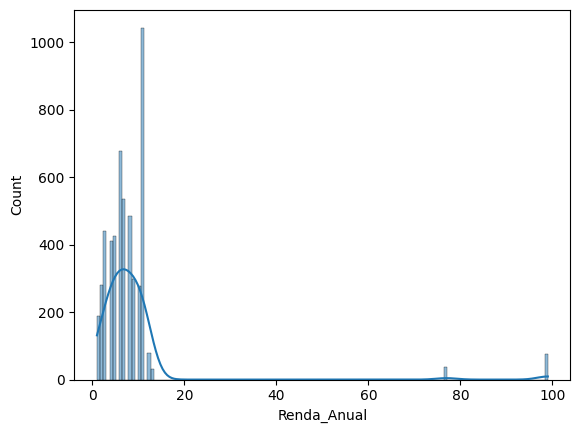

In [144]:
# GRÁFICO PELA RENDA

sns.histplot(df_depressao['Renda_Anual'], kde=True)

<Axes: xlabel='Renda_Anual', ylabel='Count'>

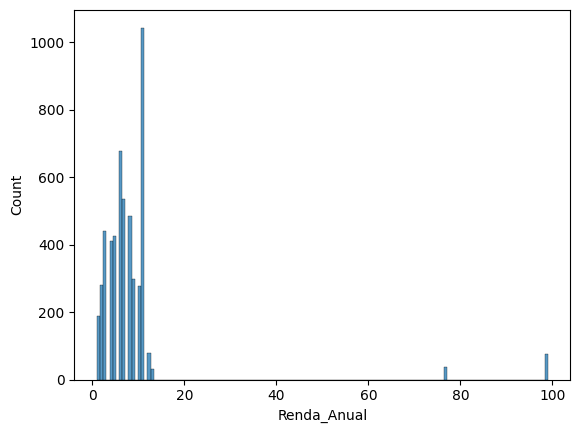

In [145]:
# GRÁFICO PELA RENDA (USANDO FILTRO)

sns.histplot(data=df_depressao[df_depressao.Renda_Anual <= 200], x='Renda_Anual')

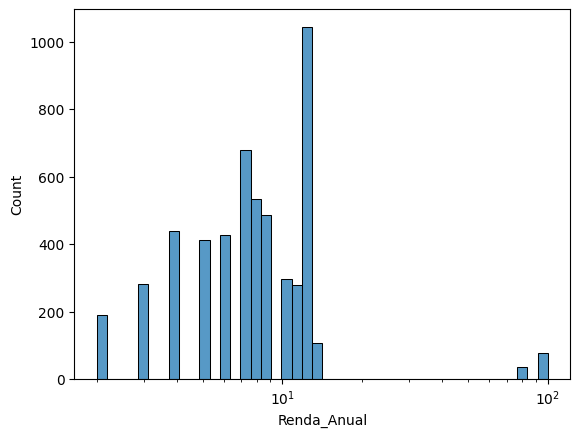

In [146]:
# # GRÁFICO PELA RENDA - TRANSFORMAÇÃO LOGARÍTMICA Logarítmica
fig, ax = plt.subplots()
ax.set(xscale="log")
sns.histplot(data=df_depressao.Renda_Anual, x=(df_depressao.Renda_Anual+1))
plt.show()

# OBS.: FOI NECESSÁRIO USAR ESSA TRANSFORMAÇÃO PARA DETALHAR MELHOR OS VALORES, DEVIDO A DOIS ITENS NA PESQUISA QUE POSSUEM OUTLINERS (77 E 99)  